É um algoritmo de aglomeração baseado em densidade: dado um conjunto de pontos em um espaço, ele agrupa pontos que estão aproximadamente empacotados juntos (pontos com muitos vizinhos próximos), marcando pontos em regiões de baixa densidade ( onde os vizinhos mais próximos estão muito distantes) como outliers.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
# Gerando dados
centers = [[1, 1],
           [-1, -1],
           [1, -1]]
X, labels_true = make_blobs(n_samples=750,
                            centers=centers, cluster_std=0.4,
                            random_state=0)

In [3]:
X = StandardScaler().fit_transform(X)

In [4]:
# Calculando DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [5]:
# Número de clusters nos rótulos, ignorando o ruído, se presente.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [6]:
print('Número estimado de clusters: %d' % n_clusters_)
print("Homogeneidade: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completude: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-medida: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Rand Index Ajustado: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Informação Mútua Ajustada: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Coeficiente de Silhueta: %0.3f"
      % metrics.silhouette_score(X, labels))

Número estimado de clusters: 3
Homogeneidade: 0.953
Completude: 0.883
V-medida: 0.917
Rand Index Ajustado: 0.952
Informação Mútua Ajustada: 0.916
Coeficiente de Silhueta: 0.626


# Plotar resultado

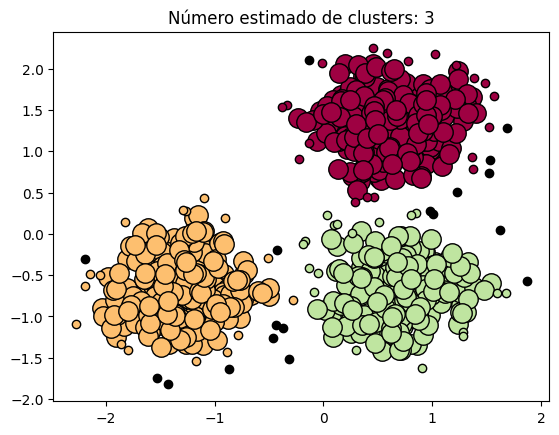

In [7]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Cor escura usada para Ruído.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1],
             'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1],
             'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Número estimado de clusters: %d' % n_clusters_)
plt.show()